## Bu ödevde ABD Eğitim Sistemi'ne ait verileri inceleyemeye devam edeceksiniz. Bu veri kümesinde eyalet bazında yıllık bir çok veri bulunmaktadır. Bu verilerin açıklamalarına yine Kaggle'dan ulaşabilirsiniz.

### Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
states_df = pd.read_csv("states_all.csv")

In [3]:
states_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [4]:
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [5]:
#Eksik değerlere bakalım
states_df.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [6]:
#Unique değerlere bakalım
for sutun_adi in states_df.columns:
    print("{} sütunundaki benzersiz değerler : {}".format(sutun_adi, states_df[sutun_adi].unique()))

PRIMARY_KEY sütunundaki benzersiz değerler : ['1992_ALABAMA' '1992_ALASKA' '1992_ARIZONA' ... '2019_WEST_VIRGINIA'
 '2019_WISCONSIN' '2019_WYOMING']
STATE sütunundaki benzersiz değerler : ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND' 'SOUTH_CAROLINA'
 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN' 'WYOMING' 'DODEA' 'NATIONAL']
YEAR sütunundaki benzersiz değerler : [1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 19

In [7]:
for column in states_df.columns:
    if states_df[column].dtype == "float64":
        for value in states_df[column]:
            try:
                float(value)
            except:
                print("{} sütunu için problemli değerler".format(value))
            

In [8]:
#Sürekli değişkenlere ait boş verileri ortalama alarak dolduralım
for i in states_df.columns:
    if states_df[i].dtype == "int64" or states_df[i].dtype == "float64":
        states_df[i].fillna(states_df[i].mean(),inplace=True)


In [9]:
#Eksik değerlere yeniden bakalım
states_df.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

### Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

In [10]:
states_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,917541.566176,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,577954.717647,282069.084967,731634.0,208.000000,252.000000,207.000000,263.558719
1,1992_ALASKA,ALASKA,1992,917541.566176,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,577954.717647,282069.084967,122487.0,236.327434,278.280731,218.806154,263.558719
2,1992_ARIZONA,ARIZONA,1992,917541.566176,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,577954.717647,282069.084967,673477.0,215.000000,265.000000,209.000000,263.558719
3,1992_ARKANSAS,ARKANSAS,1992,917541.566176,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,577954.717647,282069.084967,441490.0,210.000000,256.000000,211.000000,263.558719
4,1992_CALIFORNIA,CALIFORNIA,1992,917541.566176,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,577954.717647,282069.084967,5254844.0,208.000000,261.000000,202.000000,263.558719


In [11]:
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1715 non-null   float64
 4   TOTAL_REVENUE                 1715 non-null   float64
 5   FEDERAL_REVENUE               1715 non-null   float64
 6   STATE_REVENUE                 1715 non-null   float64
 7   LOCAL_REVENUE                 1715 non-null   float64
 8   TOTAL_EXPENDITURE             1715 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 11  OTHER_EXPENDITURE             1715 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 13  GRA

In [12]:
states_df[states_df["STATE"]=="ALABAMA"]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,917541.566176,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,...,57948.000000,58025.000000,41167.000000,577954.717647,282069.084967,731634.000000,208.000000,252.000000,207.000000,263.558719
51,1993_ALABAMA,ALABAMA,1993,727716.000000,2.827391e+06,3.314090e+05,1.729295e+06,7.666870e+05,2.833433e+06,1.564558e+06,...,57497.000000,60004.000000,39900.000000,577954.717647,282069.084967,734288.000000,236.327434,278.280731,218.806154,263.558719
102,1994_ALABAMA,ALABAMA,1994,730004.000000,2.970223e+06,3.318230e+05,1.850894e+06,7.875060e+05,3.103266e+06,1.697593e+06,...,56773.000000,59165.000000,41730.000000,577954.717647,282069.084967,736531.000000,236.327434,278.280731,208.000000,263.558719
153,1995_ALABAMA,ALABAMA,1995,727480.000000,3.367437e+06,3.289570e+05,2.161366e+06,8.771140e+05,3.353363e+06,1.851700e+06,...,56486.000000,59914.000000,40981.000000,577954.717647,282069.084967,746149.000000,236.327434,278.280731,218.806154,263.558719
204,1996_ALABAMA,ALABAMA,1996,735912.000000,3.365113e+06,3.348580e+05,2.138717e+06,8.915380e+05,3.572283e+06,1.987018e+06,...,57098.000000,58305.000000,42510.000000,577954.717647,282069.084967,747932.000000,236.327434,278.280731,218.806154,263.558719
255,1997_ALABAMA,ALABAMA,1997,737386.000000,3.981788e+06,3.762000e+05,2.498847e+06,1.106741e+06,3.963624e+06,2.095904e+06,...,57431.000000,58210.000000,44272.000000,472847.000000,208148.000000,749207.000000,236.327434,278.280731,218.806154,263.558719
306,1998_ALABAMA,ALABAMA,1998,739321.000000,4.140537e+06,3.741530e+05,2.589819e+06,1.176565e+06,4.245033e+06,2.218693e+06,...,58610.000000,57105.000000,43957.000000,473954.000000,205630.000000,747980.000000,236.327434,278.280731,211.000000,255.000000
357,1999_ALABAMA,ALABAMA,1999,737639.000000,4.471546e+06,3.930950e+05,2.752653e+06,1.325798e+06,4.622810e+06,2.399626e+06,...,60012.000000,56201.000000,42576.000000,472019.000000,202045.000000,740732.000000,236.327434,278.280731,218.806154,263.558719
408,2000_ALABAMA,ALABAMA,2000,730184.000000,4.885917e+06,4.259780e+05,3.003814e+06,1.456125e+06,5.003267e+06,2.551713e+06,...,59749.000000,56951.000000,42512.000000,472686.000000,201358.000000,739992.000000,217.000000,264.000000,218.806154,263.558719
459,2001_ALABAMA,ALABAMA,2001,728532.000000,4.832946e+06,4.661500e+05,2.879636e+06,1.487160e+06,5.086045e+06,2.656393e+06,...,58929.000000,56591.000000,42909.000000,469591.000000,201610.000000,737190.000000,236.327434,278.280731,218.806154,263.558719


In [85]:
#Her bir state için ağırlıklı ortalamayı bulalım
weighted_mean_list = []
for state in states_df.STATE:
    current_df = states_df.loc[lambda df: states_df["STATE"]==state]
    weighted_mean = (current_df["AVG_MATH_4_SCORE"].mean()*current_df["GRADES_4_G"]+current_df["AVG_MATH_8_SCORE"].mean()*current_df["GRADES_8_G"])/(current_df["GRADES_8_G"]+current_df["GRADES_4_G"])
    for i in weighted_mean.to_list():
        weighted_mean_list.append(i)
deneme = pd.DataFrame({"WEIGHTED MEAN MATH":weighted_mean_list})
new_df2 = new_df2.join(deneme)

In [106]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1715 non-null   float64
 4   TOTAL_REVENUE                 1715 non-null   float64
 5   FEDERAL_REVENUE               1715 non-null   float64
 6   STATE_REVENUE                 1715 non-null   float64
 7   LOCAL_REVENUE                 1715 non-null   float64
 8   TOTAL_EXPENDITURE             1715 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 11  OTHER_EXPENDITURE             1715 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 13  GRA

## Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

In [115]:
#Örnek olarak alabamayı alalım
alabama_df = new_df2.loc[lambda df: new_df2["STATE"]=="ALABAMA"]

In [116]:
heatmap_df = alabama_df[["TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE","CAPITAL_OUTLAY_EXPENDITURE","WEIGHTED MEAN MATH"]]
heatmap_df

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,WEIGHTED MEAN MATH
0,2.653798e+06,1.481703e+06,7.350360e+05,174053.000000,253.045158
51,2.833433e+06,1.564558e+06,7.941460e+05,204207.000000,257.003776
102,3.103266e+06,1.697593e+06,8.264420e+05,231508.000000,255.740607
153,3.353363e+06,1.851700e+06,8.889830e+05,243365.000000,254.284933
204,3.572283e+06,1.987018e+06,9.351150e+05,286699.000000,257.560846
255,3.963624e+06,2.095904e+06,1.075352e+06,420070.000000,256.943875
306,4.245033e+06,2.218693e+06,1.155492e+06,458351.000000,256.737609
357,4.622810e+06,2.399626e+06,1.208081e+06,515798.000000,254.980218
408,5.003267e+06,2.551713e+06,1.319053e+06,663903.000000,258.854842
459,5.086045e+06,2.656393e+06,1.374265e+06,540284.000000,256.739121


Text(0.5, 1.0, 'Korelasyon Matrisi')

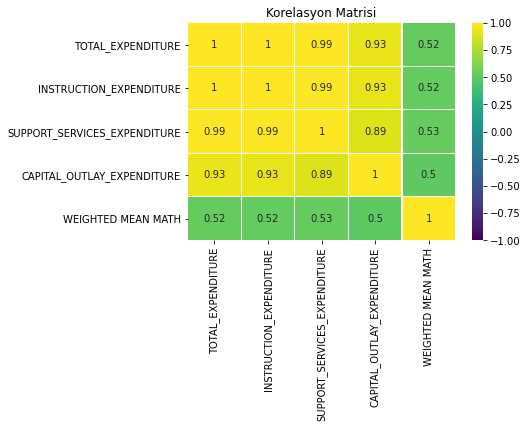

In [117]:
sns.heatmap(heatmap_df.corr(), annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi")

### Alabama eyaletinin Ağırlıklı matematik ortalamasıyla ,support service harcamaları en korele değişkenler olarak gözüküyor

## Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

In [125]:
heatmap_df.dropna()
X = StandardScaler().fit_transform(heatmap_df)
Xt = X.T
Cx = np.cov(Xt)
print('Kovaryans matrisi :\n', Cx)

Kovaryans matrisi :
 [[1.03125    1.02944455 1.0240343  0.96024577 0.5404488 ]
 [1.02944455 1.03125    1.01843599 0.95513911 0.53441686]
 [1.0240343  1.01843599 1.03125    0.92147055 0.54169276]
 [0.96024577 0.95513911 0.92147055 1.03125    0.51713416]
 [0.5404488  0.53441686 0.54169276 0.51713416 1.03125   ]]


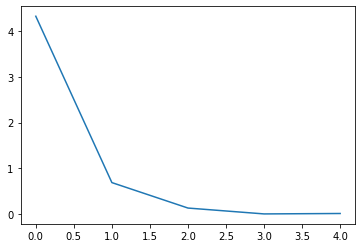

[4.33183999e+00 6.86427423e-01 1.28591633e-01 8.87865163e-05
 9.30216923e-03]


In [126]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)